# Publication-Grade Plot

Hacktiv8 PTP Introduction to Data Science Projects 1

Author: [Yoga Perdana Putra](https://github.com/yogaperdana)

***

## 1. Introduction

The aim of this project is to visualize data with Python using the [London Crime Dataset from Kaggle](https://www.kaggle.com/jboysen/london-crime). This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.

This dataset contains:
* `lsoa_code`: this represents a policing area
* `borough`: the london borough for which the statistic is related
* `major_category`: the major crime category
* `minor_category`: the minor crime category
* `value`: the count of the crime for that particular borough, in that particular month
* `year`: the year of the summary statistic
* `month`: the month of the summary statistic

---

## 2. Data Preparation

The first thing is to prepare the dataset. With Python, start by importing two key data analysis modules: Pandas and NumPy. Also importing libraries for data visualization with Matplotlib and Folium.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from timeit import default_timer
from wordcloud import WordCloud, STOPWORDS
import folium

%matplotlib inline
mpl.style.use(['ggplot'])

Then, reading the downloaded dataset file and assigning to a Pandas' data frame.

In [2]:
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')
print('Data is loaded into a Pandas data frame!')

Data is loaded into a Pandas data frame!


Let's view the top and bottom 5 rows of the dataset.

In [3]:
display(df)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


Start analyzing the dataset by getting basic information about the data frame.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


From that outputs, we can tell that the data frame contains several columns with object data type such as string values, and the other is numerical columns with integer data type values.

So far, we don't need to adjust the column properties and doing data cleansing because there's no null values information displayed. To make sure, we can check once again:

In [5]:
if df.isnull().values.any() == True:
    print('There is missing value(s) on dataset!')
else:
    print('No missing value on dataset.')

No missing value on dataset.


Next, let's view the dimensions of the dataframe:

In [6]:
print('Total rows   :', df.shape[0])
print('Total columns:', df.shape[1])

Total rows   : 13490604
Total columns: 7


Let's get unique values in borough and major categories columns.

In [7]:
print('Boroughs (' + str(df.borough.nunique()) + '):')
for value in sorted(df.borough.unique()):
    print('- ' + value)

print('Major Categories of Crimes (' + str(df.major_category.nunique()) + '):')
for value in sorted(df.major_category.unique()):
    print('- ' + value)

Boroughs (33):
- Barking and Dagenham
- Barnet
- Bexley
- Brent
- Bromley
- Camden
- City of London
- Croydon
- Ealing
- Enfield
- Greenwich
- Hackney
- Hammersmith and Fulham
- Haringey
- Harrow
- Havering
- Hillingdon
- Hounslow
- Islington
- Kensington and Chelsea
- Kingston upon Thames
- Lambeth
- Lewisham
- Merton
- Newham
- Redbridge
- Richmond upon Thames
- Southwark
- Sutton
- Tower Hamlets
- Waltham Forest
- Wandsworth
- Westminster
Major Categories of Crimes (9):
- Burglary
- Criminal Damage
- Drugs
- Fraud or Forgery
- Other Notifiable Offences
- Robbery
- Sexual Offences
- Theft and Handling
- Violence Against the Person


We've found that there is a year column. Let's check the range of recorded years.

In [8]:
print('Dataset was recorded from ' + str(df.year.min()) + ' to ' + str(df.year.max()))

Dataset was recorded from 2008 to 2016


---

## 3. Data Visualization

Let's start visualizing to answer some questions and hypothesis based on the dataset with various graphs according to their use.

---

### 3.1. Trends of Violence Against the Person Crimes with Area Chart

Area chart is used for trend-based visualizations of data over a period of time.

**Questions**:

> * How are **the trends of violence against the person crime rates** in overall London from 2008 to 2016?
> * Can you tell **which minor category has the highest and lowest crime cases** based on the chart?

We need to write some functions and the table view before plotting the charts and answer those questions.

First, we're creating new dataframe based on main dataframe by doing pivot table. Filtering data only with value 'Violence Against the Person' on `major_category` column, then applying index to `minor_category` and doing sum aggregation for numeric values on `value` every year based on `year` column and make it's unique values into column names (which are number of years from 2008 to 2016).

In [9]:
df_violence = pd \
    .pivot_table(
        df[df.major_category == 'Violence Against the Person'], 
        values='value', 
        index='minor_category', 
        columns='year', 
        aggfunc='sum'
    ) \
    .rename_axis('Years', axis=1) \
    .rename_axis('Minor Categories', axis=0)

display(df_violence)

Years,2008,2009,2010,2011,2012,2013,2014,2015,2016
Minor Categories,,,,,,,,,
Assault with Injury,56586,55297,54173,50768,50369,39929,45677,48164,50038
Common Assault,37356,39671,41591,40502,39246,37882,51244,61758,64440
Harassment,43389,43594,42808,37493,43396,41805,55330,71633,78676
Murder,130,119,113,105,95,96,81,109,101
Offensive Weapon,5961,4520,4229,3991,3134,3315,3676,4144,5013
Other violence,7721,7571,6947,6414,6623,7628,7785,9501,10588
Wounding/GBH,8701,10005,8033,7628,7151,15526,21556,23431,23525


Based on that table view, let's plot the area chart. We're applying stacked area chart with some display customizations such as color alpha, grid-line-border styles, and the legend.

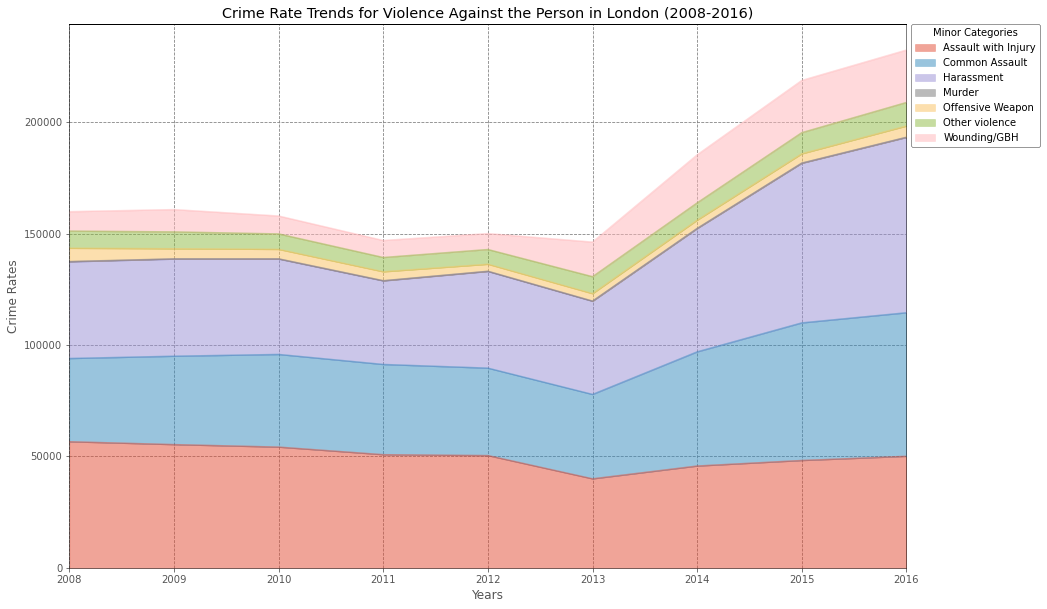

In [10]:
ax = df_violence.T.plot(kind='area', stacked=True, figsize=(15, 10), alpha=.5)

ax.legend(bbox_to_anchor=(1, 1.01), loc='upper left', title='Minor Categories', 
          facecolor='white', edgecolor='black')

ax.grid(b=True, linestyle='dashed', color='gray')
ax.patch.set_alpha(0)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(.5)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(.5)
ax.spines['left'].set_linewidth(.5)

plt.title('Crime Rate Trends for Violence Against the Person in London (2008-2016)')
plt.ylabel('Crime Rates')
plt.xlabel('Years')
plt.margins(x=0)
plt.show()

**Insights:**

> From the area chart above, we've found some insights that the trends of violence against the person crime rates in overall boroughs of London was decreased from 2008 until 2011, then slightly increased and decreased in 2012 and 2013. It began to drastically increased from 2013 to 2016, followed by changes in the number of cases in each minor categories. Year 2013 has the lowest crime cases for violence against the person and 2016 was the highest one.
> 
> From the seven minor categories that shown on the graph, we can tell that the most cases that have occurred were between assault with injury, common assault, and harassment. The least cases were crimes with murder category (almost unseen on chart).

---

### 3.2. Theft and Handling Crimes Distribution with Histogram

Histogram is used to representing the frequency distribution of numeric dataset.

**Question:**

> How is the **theft and handling crime rates distribution** that occured in all London's boroughs in 2016?

We need to write some functions first and create table view before plotting the charts and answer that question.

We're creating new dataframe based on main dataframe by doing pivot table. Filtering data only with value 'Theft and Handling' on `major_category` column AND `year` 2016, then applying index to `borough` and doing sum aggregation for numeric values on `value` every `minor_category` column and make each of it's unique values into column name. Because there are some data that are not available on some categories in certain areas and it'll counted as null values, we must filling those value with zero.

In [11]:
df_theft = pd \
    .pivot_table(
        df[
            (df.major_category == 'Theft and Handling')
            & (df.year == 2016)
        ], 
        values='value', 
        index='borough', 
        columns='minor_category', 
        aggfunc='sum', 
        fill_value=0
    ) \
    .rename_axis('Minor Categories', axis=1) \
    .rename_axis('Boroughs', axis=0)

display(df_theft)

Minor Categories,Handling Stolen Goods,Motor Vehicle Interference & Tampering,Other Theft,Other Theft Person,Theft From Motor Vehicle,Theft From Shops,Theft/Taking Of Motor Vehicle,Theft/Taking of Pedal Cycle
Boroughs,,,,,,,,
Barking and Dagenham,21,278,1920,340,1044,905,912,187
Barnet,34,574,3565,659,2259,1588,817,235
Bexley,25,260,1481,171,909,825,574,147
Brent,38,412,3235,696,1839,1479,884,443
Bromley,24,342,2677,341,1437,1845,716,202
Camden,60,383,5706,2759,1596,1673,847,1064
City of London,0,0,59,51,2,8,2,7
Croydon,44,382,3203,606,1812,1842,1078,262
Ealing,73,380,3470,599,2189,1896,845,588


Let's plot the histogram from table view above. We're applying histogram with 30 bins, some display customizations such as coloring styles, grid-line-border styles, and the legend.

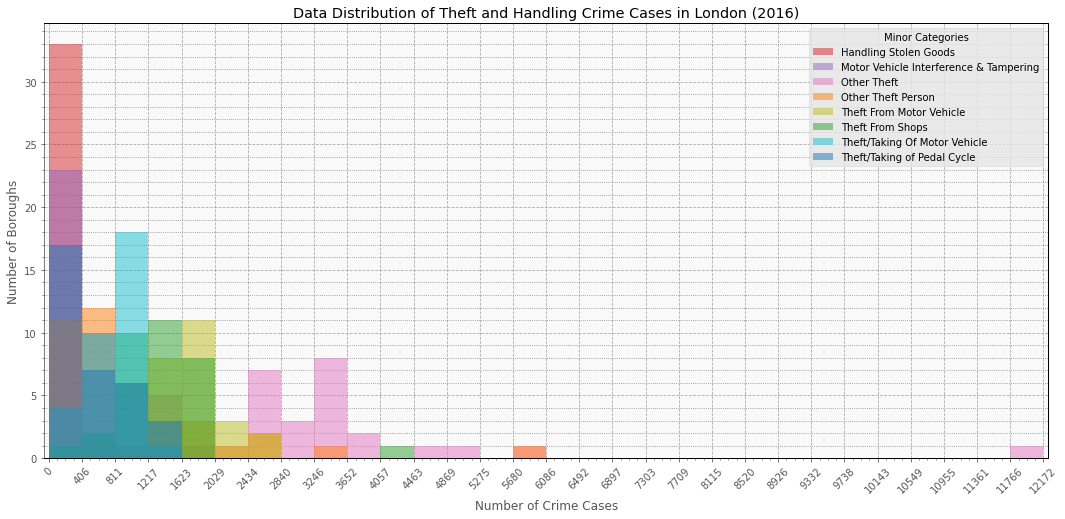

In [12]:
n_bins = 30
count, bin_edges = np.histogram(df_theft, n_bins)
colors = ['tab:red', 'tab:purple', 'tab:pink', 'tab:orange', 'tab:olive', 'tab:green', 'tab:cyan', 'tab:blue']

ax = df_theft.plot(kind='hist', figsize=(18, 8), bins=n_bins, alpha=.5, xticks=bin_edges, color=colors)

ax.grid(b=True, which='major', linestyle='dashed', color='darkgray')
ax.grid(b=True, which='minor', linestyle='dotted', color='gray', axis='y')
ax.patch.set_alpha(.2)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(.5)

plt.title('Data Distribution of Theft and Handling Crime Cases in London (2016)')
plt.xlabel('Number of Crime Cases')
plt.ylabel('Number of Boroughs')
plt.xticks(rotation=45)
plt.minorticks_on()
plt.margins(x=.005)
plt.show()

**Insights:**

> From the histogram above, we've found that theft and handling crimes data are distributed right-skewed because the first bin on the left is the most frequently occured in large number of boroughs in London.
> 
> There are 8 minor categories with highly reported 'other theft' incidents in one specific borough (as shown in the rightmost bin). This 'other theft' is surely a combination of various types of ungrouped categories with various number of cases.

---

### 3.3. Drugs Crimes in Selected Boroughs with Bar Charts

Bar chart is used to representing numerical and categorical variables grouped in intervals.

**Questions:**

> * **Between Westminster, Brent, and Lambeth, which has the highest drugs crime rate** in 2008 and how it changes until 2016?
> * **Which year has the highest drugs crime rate** in those three boroughs between 2008-2016?

We need to write some functions and the table view before plotting the charts and answer those questions.

We're creating new dataframe based on main dataframe by doing pivot table. Filtering data only with value 'Drugs' on `major_category` column AND `borough` for Westminster, Brent, Lambeth, and Newham. Then, applying index to `year`, doing sum aggregation for numeric values on `value` every `borough` column and make each of it's unique values into column name.

In [13]:
select_boroughs = ['Westminster', 'Brent', 'Lambeth', 'Newham']

df_drugs = pd \
    .pivot_table(
        df[
            (df.major_category == 'Drugs') 
            & (df.borough.isin(select_boroughs))
        ], 
        values='value', 
        index='year', 
        columns='borough', 
        aggfunc='sum'
    ) \
    .rename_axis('Boroughs', axis=1) \
    .rename_axis('Years', axis=0)

display(df_drugs)

Boroughs,Brent,Lambeth,Newham,Westminster
Years,,,,
2008,2813,3848,2526,4075
2009,2579,3154,2365,3894
2010,2980,2950,2772,4632
2011,4042,2920,2160,5670
2012,3428,2290,1857,4654
2013,3341,1894,1622,4151
2014,2891,2637,1721,2804
2015,1808,2652,1682,2102
2016,2096,2738,1684,2049


Based on that table view, let's plot the bar chart. We're also applying some display customizations such as coloring, grid-line-border styles, and the legend.

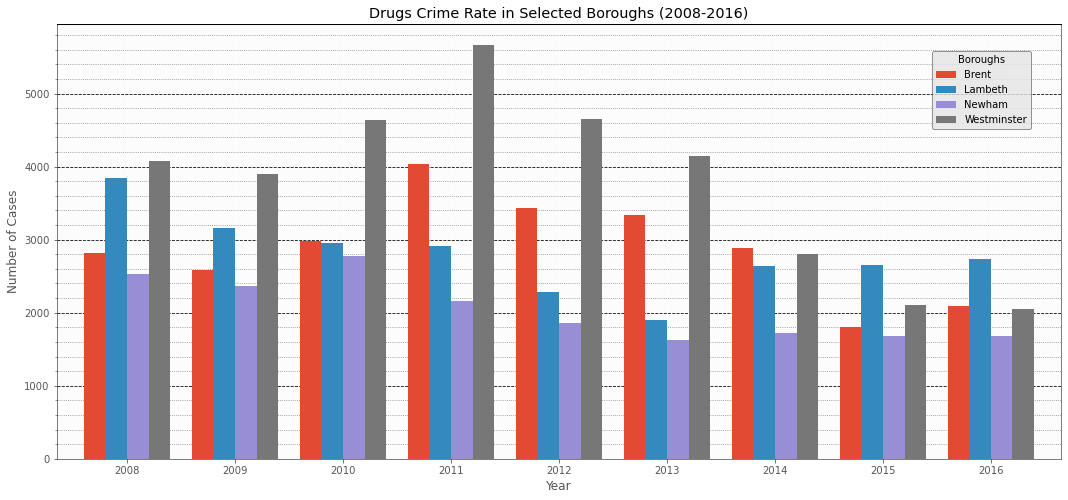

In [14]:
ax = df_drugs.plot(kind='bar', figsize=(18, 8), width=.8)

ax.legend(title='Boroughs', edgecolor='black', bbox_to_anchor=(.975, .95))

ax.grid(b=True, axis='y', which='major', linestyle='dashed', color='black')
ax.grid(b=True, axis='y', which='minor', linestyle='dotted', color='gray')
ax.tick_params(axis='x', which='minor', bottom=False)
ax.patch.set_alpha(.1)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(.5)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(.5)
ax.spines['left'].set_linewidth(.5)

plt.title('Drugs Crime Rate in Selected Boroughs (2008-2016)')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.minorticks_on()
plt.show()

**Insights:**

> From the bar charts above we've found that in 2008, Westminster has the highest rate of drugs crime compared to the others. However, the number began to decreased significantly from 2011, making it no longer the highest in 2016 and overtaken with Lambeth.
> 
> Highest drugs crime rate in both Westminster and Brent has occured in 2011, Lambeth itself in 2008, and Newham in 2010.

---

### 3.4. Crime Rates in London with Pie Charts

A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices.

**Question:**

> How are **the percentages and comparison of each major categories of crimes that occured in London in 2008 and 2016**?

We need to write some functions and the table view before plotting the charts and answer that question.

We're creating new dataframe based on main dataframe by doing pivot table. Then, applying index to `major_category`, doing sum aggregation for numeric values on `value` every `year` column and make each of it's unique values into column name.

In [15]:
df_crime = pd \
    .pivot_table(
        df, 
        values='value', 
        index='major_category', 
        columns='year', 
        aggfunc='sum'
    ) \
    .rename_axis('Years', axis=1) \
    .rename_axis('Major Categories', axis=0)

display(df_crime)

Years,2008,2009,2010,2011,2012,2013,2014,2015,2016
Major Categories,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914
Fraud or Forgery,5325,0,0,0,0,0,0,0,0
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528
Sexual Offences,1273,0,0,0,0,0,0,0,0
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381


Based on that table view, let's plot the pie chart. We're also applying some display customizations such as coloring styles and the legend. The charts created within subplots because we want to display data in multiple years (2008 and 2016). On `autopct` parameter, percentages will be displayed as two floating points and zero percent proportion will not displayed.

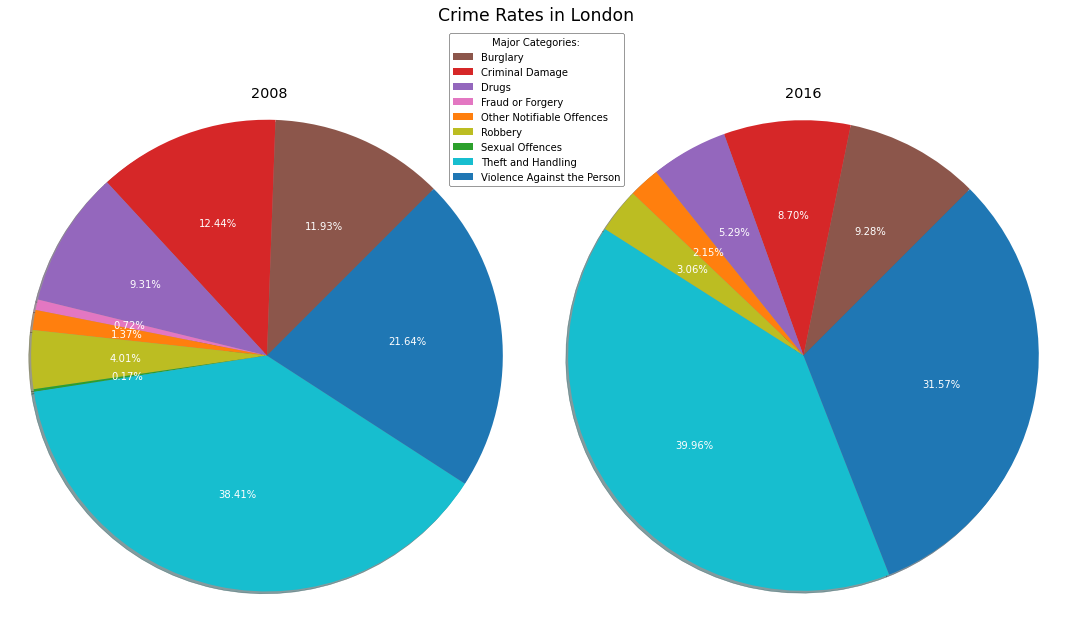

In [16]:
colors = [
    'tab:brown', 'tab:red', 'tab:purple', 
    'tab:pink', 'tab:orange', 'tab:olive', 
    'tab:green', 'tab:cyan', 'tab:blue'
]
select_years = [2008, 2016]

fig, ax = plt.subplots(1, 2, figsize=(15, 8), tight_layout=True)
fig.suptitle('Crime Rates in London', fontsize='xx-large', y=1.07)

for i in range(len(select_years)):
    ax[i].pie(
        df_crime[select_years[i]], 
        labels=None, 
        shadow=True, 
        startangle=45, 
        radius=2, 
        autopct=lambda p: '{:.2f}%'.format(p) if (p > 0) else '', 
        colors=colors, 
        textprops={'color': 'w'}
    )
    ax[i].axis('equal')
    ax[i].set_title(str(select_years[i]))

fig.legend(
    df_crime.index.values, 
    title='Major Categories:', 
    loc='lower center', 
    bbox_to_anchor=(.5, .75), 
    facecolor='white', 
    edgecolor='black'
)
plt.show()

**Insights:**

> From the pie charts above, we've found that theft and handling crime category has larger proportion than others in both years 2008 and 2016. Theft and handling crimes has occured in 2008 for 38.41% from the total and become 39.96% in 2016.
> 
> In 2008, crime cases categorized as sexual offences were recorded at 0.17% and fraud or forgery crimes at 0.7%. However, there is no data for both in 2016. 

---

### 3.5. Criminal Damages Distribution with Box Plots

A box plot is a way of statistically representing the distribution of the data through five main dimensions:

- **Minimum:** Smallest number in the dataset.
- **First quartile:** Middle number between the minimum and the median.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between median and maximum.
- **Maximum:** Highest number in the dataset.

**Question:**

> How is the **distribution comparison of the number of criminal damages** that occurs in London for the period 2008-2016?

We need to write some functions first before plotting and answer that question.

We're creating new dataframe based on main dataframe by doing pivot table. Filtering data only with value 'Criminal Damage' on `major_category` column. Then, applying index to `year`, doing sum aggregation for numeric values on `value` every `minor_category` column and make each of it's unique values into column name.

In [17]:
df_damage = pd \
    .pivot_table(
        df[(df.major_category == 'Criminal Damage')], 
        values='value', 
        index='year', 
        columns='minor_category', 
        aggfunc='sum'
    ) \
    .rename_axis('Minor Categories', axis=1) \
    .rename_axis('Years', axis=0)

display(df_damage)

Minor Categories,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Other Criminal Damage
Years,,,,
2008,23519,41693,9011,17649
2009,22475,36621,8348,18121
2010,20253,32907,7962,16775
2011,18037,29494,7445,15938
2012,15330,25777,6753,14298
2013,13512,23452,6367,12875
2014,13391,24137,6641,15110
2015,13648,25595,6776,16957
2016,13951,25787,6700,17633


We can also find out more details about the statistics.

In [18]:
with pd.option_context('display.precision', 3):
    display(df_damage.describe())

Minor Categories,Criminal Damage To Dwelling,Criminal Damage To Motor Vehicle,Criminal Damage To Other Building,Other Criminal Damage
count,9.00,9.000,9.000,9.000
mean,17124.00,29495.889,7333.667,16150.667
std,4069.77,6316.859,916.068,1755.530
min,13391.00,23452.000,6367.000,12875.000
25%,13648.00,25595.000,6700.000,15110.000
50%,15330.00,25787.000,6776.000,16775.000
75%,20253.00,32907.000,7962.000,17633.000
max,23519.00,41693.000,9011.000,18121.000


Let's plot the box plots. Plots displayed vhorizontally. We're also applying some display customizations such as styling for colors and grids.

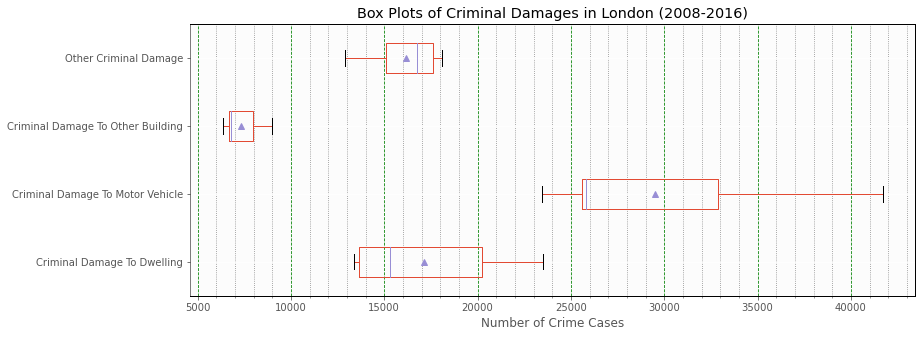

In [19]:
ax = df_damage.plot(kind='box', figsize=(13, 5), vert=False, showmeans=True)

ax.grid(b=True, which='major', linestyle='dashed', color='green', axis='x')
ax.grid(b=True, which='minor', linestyle='dotted', color='gray', axis='x')
ax.tick_params(axis='y', which='minor', left=False)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(.5)
ax.patch.set_alpha(.1)

plt.title('Box Plots of Criminal Damages in London (2008-2016)')
plt.xlabel('Number of Crime Cases')
plt.minorticks_on()
plt.show()

**Insights:**

> From the box plots above, we've found that criminal damage to motor vehicle has the highest and longest data distribution compared to the others. Between 2008-2016, motor vehicles have been damaged by criminal acts at least with a minimum of around 23000 cases, a maximum of under 42,000 cases, overall average between 29000 to 30000 cases with median below 26000 cases. It can also be seen from the plots that more criminal damage is done to dwelling or residences than to other buildings.
> 
> So far, we've not found any odd numbers that identified as data outliers. Although in the crimes of vehicle damage, there are maximum data far apart from average but the median is still above the first quartile.

---

### 3.6. Monthly Robbery Crimes with Scatter Plots

A scatter plot (2D) is a useful method of comparing variables against each other. The data in a scatter plot is considered to express a trend.

**Question:**

> How are **the trends of robbery crime rates in overall London by month** between January 2008 until December 2016?

We need to write some functions first before plotting and answer the question.

Creating new dataframe based on main dataframe with data filtering match only with 'Robbery' value on `major_category` column, group data by `year` and `month`, then summing numerics on `value`. We want to create plots with x asis as monthly values. To do that, we must create new columns that combining `year` and `month` values as date type, ignoring the date which is always on 1st day of that month.

In [20]:
df_robbery = df[df.major_category == 'Robbery'] \
    .groupby(['year', 'month'], as_index=False)['value'].sum()
df_robbery.insert(0, 'year_month', 
    pd.to_datetime(
        df_robbery[['year', 'month']].apply(
            lambda x: '-'.join(x.values.astype(str)), 
            axis="columns"
        )
    )
)
display(df_robbery)

,year_month,year,month,value
0,2008-01-01,2008,1,2887
1,2008-02-01,2008,2,2455
2,2008-03-01,2008,3,2585
3,2008-04-01,2008,4,2498
4,2008-05-01,2008,5,2490
...,...,...,...,...
103,2016-08-01,2016,8,1910
104,2016-09-01,2016,9,1980
105,2016-10-01,2016,10,2048
106,2016-11-01,2016,11,1983


Let's plot the scatter plots. X axis is based on date column and Y axis is for value. Applying some display customizations such as styling for colors and grids. For the x axis, we'll divide as major grids for year and minor grids as month. We must doing some formatting such as date formatter and applying month locator on minor grids.

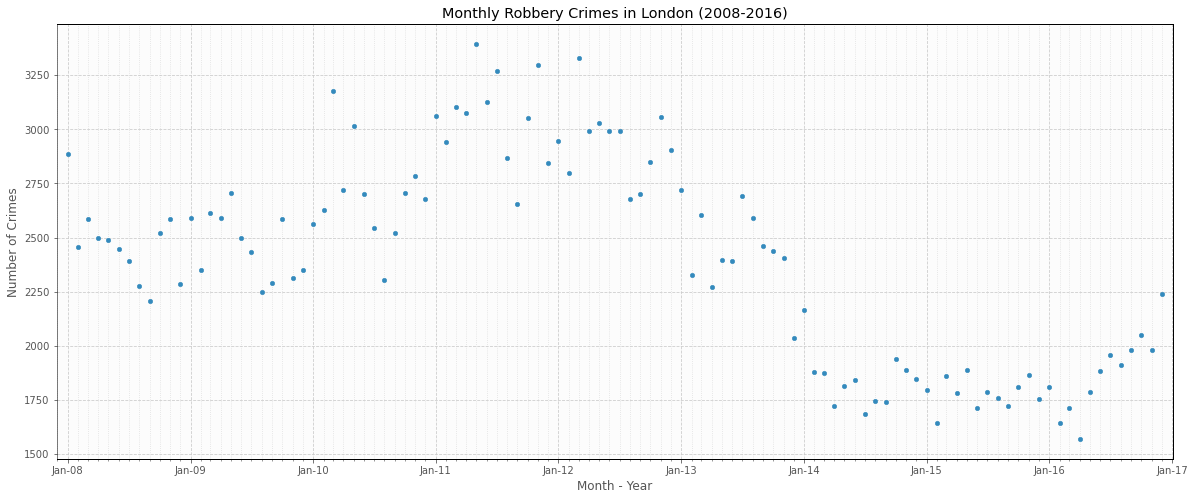

In [21]:
ax = df_robbery.plot(kind='scatter', figsize=(20, 8), x='year_month', y='value')

ax.xaxis.set_major_formatter(DateFormatter("%b-%y"))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.grid(b=True, which='major', linestyle='dashed', color='#cccccc', axis='both')
ax.grid(b=True, which='minor', linestyle='dotted', color='#dddddd', axis='x')

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
ax.spines['left'].set_linewidth(.5)
ax.patch.set_alpha(.1)

plt.title('Monthly Robbery Crimes in London (2008-2016)')
plt.xlabel('Month - Year')
plt.ylabel('Number of Crimes')
plt.margins(x=.01)
plt.show()

**Insights:**

> From the scatter plots above, we've found that robbery crimes in overall London has increased between January 2008 until around early 2012. Then it has started to decreased drastically until early 2014 and the number has begun to stabilized after that, until mid-2016 began to show an increase in crimes again. Overall, there were fewer robberies after 2014 than in previous months and years.

---

### 3.7. Common Crime Minor Categories with Word Clouds

Also known as text clouds or tag clouds, word clouds work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

**Question:**

> What was **the most common criminal category** (based on minor category listing in the dataset) in overall London from 2008 to 2016?

We need to write some functions before creating the word clouds and answer those questions.

**Notice: It will take a little longer to process the code,** because we're not doing tight sampling and limiting the words. Timer is included to view the estimated time will take to render the word cloud.

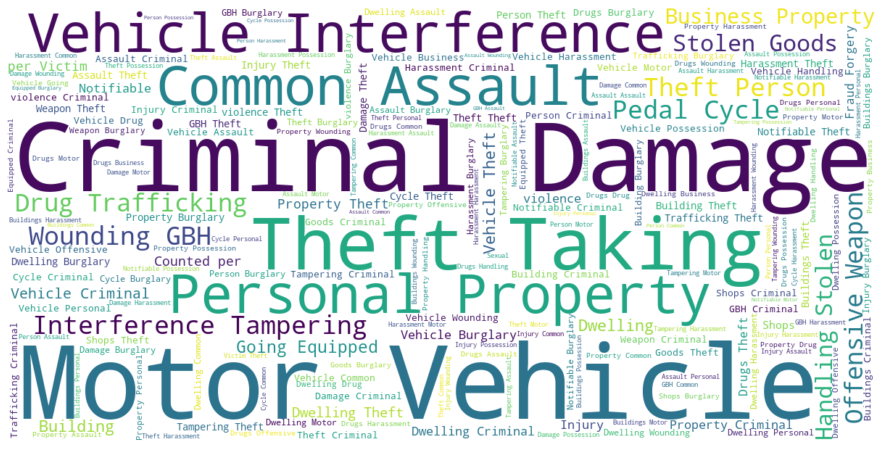

Elapsed time: 243 sec.


In [22]:
# It will take a little longer to process
tic = default_timer()

stopwords = set(STOPWORDS)
wc_crime = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords, random_state=1)
wc_crime.generate(' '.join(df.minor_category))

fig = plt.figure(figsize=(16, 8))

plt.imshow(wc_crime, interpolation='bilinear')
plt.axis('off')
plt.show()

toc = default_timer()
print('Elapsed time: ' + str(round(toc-tic)) + ' sec.')

**Insights:**

> From the word clouds above, we've found that there are some stand out words like "Criminal Damage" and "Motor Vehicle". We can combine that phrases as minor category named **Criminal Damage to Motor Vehicle**. There are other words that stand out like "Theft Taking", "Common Assault", "Vehicle Interference" and "Personal Property". THose words are the most common criminal category that is allegedly the most prevalent in London from 2008 to 2016 based on the dataset.

---

### 3.8. Greater London Area with Folium Maps

Folium is a powerful Python library that helps to create several types of Leaflet maps with interactive results.

We need to write some functions first before creating the maps. Given parameters of longitude and latitude of London area with zoom view of 11 within Folium map's function.

In [23]:
london_map = folium.Map(location=[51.51275, -0.12632], zoom_start=11)
display(london_map)

---

## 4. Overall Analysis

We have analyzed and visualized various data from the London Crime Dataset, both as overall and categorically, where the dataset can be grouped by borough, major category, minor category, year and month of occurrence.

On the first visualization, we have been able to find out the trends of violence against the person crime rates in overall London using area charts. We can use this kind of chart for another category to find out it's trend based on time.

Next, we have a histogram. This kind of graph is a bit difficult to build with properly using this dataset because of it's data distribution. But we have been able to look at the data distribution for theft and handling crime records which is skewed.

Aside from histogram, bar chart is more easier to presenting numerical and categorical variables grouped in intervals. As it has been done to view the drugs crime records. We didn't select the entire boroughs because there are so many of them and the graph will be very crowded and difficult to read. So we choose several boroughs at random whose records are approximately large.

Pie chart is good to show the proportions of categorical variables. In this case, we have seen the percentage of major gategory crimes in Greater London for 2008 and 2016. We've been able to find out that there is a change in the proportion from both years and it turns out that there are two categories that are not recorded in 2016.

We have also been able to know the distribution of the data by using box plot. We've used criminal damages category and we've found that criminal damage to motor vehicle has the highest and longest data distribution compared to the others. Fortunately, there is no identified data outliers from the box plots.

Another way to see trends over the time is using scatter plots. We've been able to find out the robbery crimes from January 2008 until December 2016 by a monthly basis. It seems that there were fewer robberies after 2014 than in previous months and years. We can also apply this to other categories to find out the respective trends.

Another form of data visualization is using word clouds. It represents the words that stand out as a measure that they are the most frequently found in the dataset. We've used crimes based on minor category to identify which is the most common crimes that occured in London. It turns out that the words referring to criminal damage to motor vehicle are the most stand out between others. It's almost in sync when making a box plot for criminal damage crimes, that category has the higher cases than others.

Last, we can make use of the Folium map to visualize the data. Unfortunately because of limited contents from the dataset, we cannot do more in-depth analysis using the Folium map. Only the LSOA code is available, not with longitude and latitude. But we can see the approximate area in London and it's boroughs.